### Guilherme Lourenço

Para a questão de **Estatística para Ciências de Dados** e **Aprendizado Dinâmico**, sugerem-se alguns comandos e passos em Python a seguir. Outros comandos podem ser usados conforme a necessidade.

**Algumas instruções**

- Salve este arquivo .ipynb e os dados indicados no enunciado da sua questão no moodle na mesma pasta na sua máquina local.

- Responda às questões no moodle com base nos resultados obtidos nas suas análises. 

- Você deverá fazer o upload do arquivo de notebook .ipynb para conferência posterior, nos casos em que as correções automatizadas configuradas no sistema não levem em consideração diferentes versões do mesmo método estatístico implementadas em Python.

Boa prova!

Mariana e Cibele

In [1]:
# Instale os pacotes abaixo nas versões indicadas

# !pip install statsmodels==0.11.1
# !pip install scipy==1.4.1
# !pip install pmdarima==1.7.1

In [2]:
# Carregue as bibliotecas 

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols

import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse

from pmdarima import auto_arima

import seaborn as sns

**Baixe os dados indicados no link indicado no enunciado da sua questão no moodle e salve como 'dados.csv'**

As variáveis da base de dados são

Y: produção mensal de grãos (toneladas)

X: tempo desde o início do registro (meses)

D: 0, se a observação faz parte das 10 primeiras décadas e 1 se faz parte das 10 últimas décadas 

In [3]:
dados = pd.read_csv('Item2.csv',index_col=0)
dados.head()

,X,Y,D
1980-01-31,0.0,0.572232,0.0
1980-02-29,1.0,2.292779,0.0
1980-03-31,2.0,3.994551,0.0
1980-04-30,3.0,2.844265,0.0
1980-05-31,4.0,7.374953,0.0


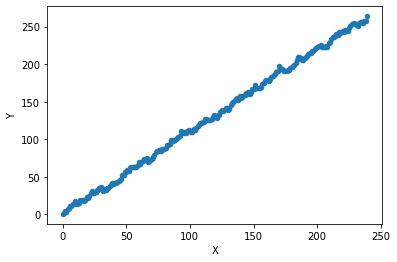

In [4]:
dados.plot.scatter('X','Y');

**Teste t de Student (bicaudal) para média de duas populações Normais com variâncias diferentes.**

**Comando sugerido: stats.ttest_ind**

**A variável D indica se a observação faz parte das 10 primeiras ou 10 últimas décadas.**

In [5]:
decada_80 = dados[dados['D'] == 0]['Y']
decada_90 = dados[dados['D'] == 1]['Y']

In [6]:
np.mean(decada_80)

66.46479814519525

In [7]:
np.mean(decada_90)

198.14475947375726

In [8]:
_, p_value = stats.ttest_ind(decada_80, decada_90)
print(f'T-TEST -> P-VALUE: {p_value}')

T-TEST -> P-VALUE: 2.2308940545773717e-73


**Teste de Levene**

**Comando sugerido: stats.levene**

In [9]:
_, p_value = stats.levene(decada_80, decada_90)
print(f'LEVENE -> P-VALUE: {p_value}')


LEVENE -> P-VALUE: 0.7967199994956675


**Ajuste o modelo de regressão linear simples** 

**Comando sugerido: ols**

In [10]:
mod = ols('Y ~ X',data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.902e+05
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:25:46   Log-Likelihood:                -577.97
No. Observations:                 240   AIC:                             1160.
Df Residuals:                     238   BIC:                             1167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1618      0.348      3.343      0.0

In [11]:
# Calcule os valores preditos de E(Y)
ypred=res.fittedvalues

# Obtenha o resíduo = observado-ajustado
residuo = res.resid

dados['residuo'] = residuo

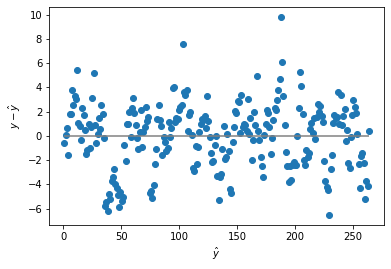

In [12]:
plt.scatter(ypred, residuo)
plt.xlabel('$\hat{y}$')
plt.ylabel('$y-\hat{y}$')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray');

In [13]:
meses_1990 = dados.loc['1990-01-01':'1990-12-31']['X']
meses_1990 = list(zip(list(meses_1990.index), meses_1990))

for mes, valor in meses_1990:
    print(f'MÊS: {mes} | VALOR: {valor} | PREDICAO: { round(1.1618 + 1.0974 * valor, 2)}')

MÊS: 1990-01-31 | VALOR: 120.0 | PREDICAO: 132.85
MÊS: 1990-02-28 | VALOR: 121.0 | PREDICAO: 133.95
MÊS: 1990-03-31 | VALOR: 122.0 | PREDICAO: 135.04
MÊS: 1990-04-30 | VALOR: 123.0 | PREDICAO: 136.14
MÊS: 1990-05-31 | VALOR: 124.0 | PREDICAO: 137.24
MÊS: 1990-06-30 | VALOR: 125.0 | PREDICAO: 138.34
MÊS: 1990-07-31 | VALOR: 126.0 | PREDICAO: 139.43
MÊS: 1990-08-31 | VALOR: 127.0 | PREDICAO: 140.53
MÊS: 1990-09-30 | VALOR: 128.0 | PREDICAO: 141.63
MÊS: 1990-10-31 | VALOR: 129.0 | PREDICAO: 142.73
MÊS: 1990-11-30 | VALOR: 130.0 | PREDICAO: 143.82
MÊS: 1990-12-31 | VALOR: 131.0 | PREDICAO: 144.92


    **Verifique a suposição de distribuição Normal dos resíduos**

**Comando sugerido: stats.probplot**

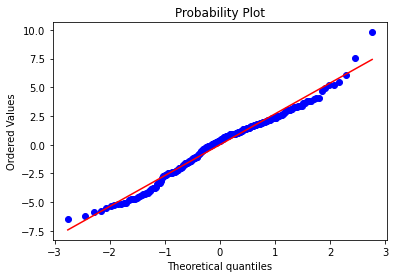

In [14]:
stats.probplot(
  dados['residuo'],
  plot = plt
  );


**Verifique os gráficos de autocorrelação e autocorrelação parcial dos resíduos.** 

**Comandos sugeridos: plot_acf e plot_pacf**

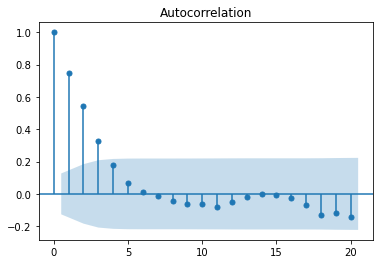

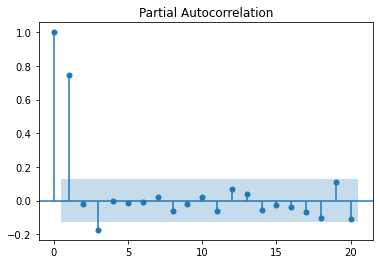

In [15]:
lags=20
plot_acf(dados['residuo'],lags=lags);
plot_pacf(dados['residuo'],lags=lags);

**Indique qual a ordem mais adequada de um modelo ARIMA(p,d,q) para os resíduos.**

**Use a função auto_arima e stepwise, como feito em aula.**

In [16]:
stepwise_fit = auto_arima(dados['residuo'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1162.548, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1159.938, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=969.608, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1046.422, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1157.938, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=967.638, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=969.609, Time=0.21 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=971.591, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=969.492, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=969.539, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1044.439, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=970.525, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=965.638, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7]             : AIC=967.608, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[7]             : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -480.819
Date:                Sat, 12 Dec 2020   AIC                            965.638
Time:                        17:25:53   BIC                            972.599
Sample:                             0   HQIC                           968.443
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7430      0.042     17.745      0.000       0.661       0.825
sigma2         3.2078      0.259     12.375      0.000       2.700       3.716
===================================================================================
Ljung-Box (Q):                       52.48   Jarque-Bera (JB):                 3.87
Prob(Q):                              0.09   Prob(JB):                         0.14
Heteroskedasticity (H):               0.98   Skew:                             0.06
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Divida a base em treino e teste, separando 80% das observações para treino.**

In [17]:
dados_treino = dados.iloc[:round((len(dados) * 0.8))]
dados_teste = dados.iloc[round((len(dados) * 0.8)):] 
len(dados_treino)

192

**Obtenha a ordem do melhor modelo ARIMA (p,d,q) para a variável resposta Y considerando somente a base de treino.**


In [18]:
stepwise_fit = auto_arima(dados_treino['Y'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=800.165, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=801.300, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=801.326, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=850.463, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=801.389, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=801.412, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=799.801, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=801.321, Time=0.12 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=801.795, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=801.307, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=799.770, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=801.307, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=803.770, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -396.885
Date:                Sat, 12 Dec 2020   AIC                            799.770
Time:                        17:25:56   BIC                            809.527
Sample:                             0   HQIC                           803.722
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0914      0.126      8.684      0.000       0.845       1.338
ma.L1         -0.1143      0.072     -1.588      0.112      -0.255       0.027
sigma2         3.7356      0.354     10.565      0.000       3.043       4.429
===================================================================================
Ljung-Box (Q):                       51.89   Jarque-Bera (JB):                 2.48
Prob(Q):                              0.10   Prob(JB):                         0.29
Heteroskedasticity (H):               1.29   Skew:                            -0.20
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
modelo = SARIMAX(dados_treino['Y'],order=(0,1,1),seasonal_order=(0,0,0,7))
resultado = modelo.fit()
resultado.summary()

/home/guilo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/home/guilo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  192
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -422.675
Date:                Sat, 12 Dec 2020   AIC                            849.350
Time:                        17:25:56   BIC                            855.855
Sample:                    01-31-1980   HQIC                           851.985
                         - 12-31-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1059      0.075      1.407      0.159      -0.042       0.253
sigma2         4.8938      0.526      9.298      0.000       3.862       5.925
===================================================================================
Ljung-Box (Q):                       61.62   Jarque-Bera (JB):                 4.02
Prob(Q):                              0.02   Prob(JB):                         0.13
Heteroskedasticity (H):               1.15   Skew:                            -0.29
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Obtenha o erro quadrático médio das previsões das observações da base de teste.**

In [20]:
inicio=len(dados_treino)
fim=len(dados_treino)+len(dados_teste)-1

previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels')
previsões.index = dados_teste.index


In [21]:
error = rmse(dados_teste['Y'], previsões)
error

31.909755830906068